In [1]:
from models import Model_FFN
from models import Model_CNN

/Users/jeppegrejspetersen/.local/share/mamba/envs/final_proj_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = Model_FFN(data_path='/Users/jeppegrejspetersen/Code/Final_project_AppML/era5')


In [5]:
model.load_data(sub_sampling=False)

Msl input shape: (1827, 120, 408)
input_file_names: ['era5_1940_mean_sea_level_pressure.nc', 'era5_1941_mean_sea_level_pressure.nc', 'era5_1942_mean_sea_level_pressure.nc', 'era5_1943_mean_sea_level_pressure.nc', 'era5_1944_mean_sea_level_pressure.nc']
T850 input shape: (1827, 120, 408)
input_file_names_t850: ['era5_1940_temperature_850hPa.nc', 'era5_1941_temperature_850hPa.nc', 'era5_1942_temperature_850hPa.nc', 'era5_1943_temperature_850hPa.nc', 'era5_1944_temperature_850hPa.nc']
Precipitation target shape: (1827,)
target_file_names: ['era5_1940_total_precipitation.nc', 'era5_1941_total_precipitation.nc', 'era5_1942_total_precipitation.nc', 'era5_1943_total_precipitation.nc', 'era5_1944_total_precipitation.nc']
No sub-sampling applied.
X shape: (1827, 2, 120, 408)
Precipitation target shape: (1827,)


In [6]:
model.prepare_data_for_tensorflow(test_size=0.1)

X_train shape: (1645, 2, 120, 408)
y_train shape: (1645, 1)
X_test shape: (182, 2, 120, 408)
y_test shape: (182, 1)
torch.Size([1645, 2, 120, 408])
torch.Size([1645, 1])


[I 2025-06-02 10:18:40,335] A new study created in memory with name: no-name-2a07e97b-042b-485c-acfa-aa83ced2954f
/Users/jeppegrejspetersen/.local/share/mamba/envs/final_proj_env/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [512, 256] which is of type list.
  warnings.warn(message)
/Users/jeppegrejspetersen/.local/share/mamba/envs/final_proj_env/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [512, 512, 256] which is of type list.
  warnings.warn(message)
/Users/jeppegrejspetersen/.local/share/mamba/envs/final_proj_env/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persis

Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FFNN                                     [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 2048]                 200,542,208
│    └─BatchNorm1d: 2-2                  [1, 2048]                 4,096
│    └─ELU: 2-3                          [1, 2048]                 --
│    └─Dropout: 2-4                      [1, 2048]                 --
│    └─Linear: 2-5                       [1, 2048]                 4,196,352
│    └─BatchNorm1d: 2-6                  [1, 2048]                 4,096
│    └─ELU: 2-7                          [1, 2048]                 --
│    └─Dropout: 2-8                      [1, 2048]                 --
│    └─Linear: 2-9                       [1, 1024]                 2,098,176
│    └─BatchNorm1d: 

[I 2025-06-02 10:23:52,119] Trial 0 finished with value: 0.1624232977628708 and parameters: {'hidden_dims': [2048, 2048, 1024, 1024, 1024, 1024, 256], 'dropout_rate': 0.20594033935487277, 'learning_rate': 5.3868074127014544e-05, 'weight_decay': 0.0006721546699400171, 'output_activation': 'none'}. Best is trial 0 with value: 0.1624232977628708.
/Users/jeppegrejspetersen/.local/share/mamba/envs/final_proj_env/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [512, 256] which is of type list.
  warnings.warn(message)
/Users/jeppegrejspetersen/.local/share/mamba/envs/final_proj_env/lib/python3.10/site-packages/optuna/distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains [512, 512, 256] which is of type list.
  warnings.warn(message)
/User

Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FFNN                                     [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 512]                  50,135,552
│    └─BatchNorm1d: 2-2                  [1, 512]                  1,024
│    └─ELU: 2-3                          [1, 512]                  --
│    └─Dropout: 2-4                      [1, 512]                  --
│    └─Linear: 2-5                       [1, 256]                  131,328
│    └─BatchNorm1d: 2-6                  [1, 256]                  512
│    └─ELU: 2-7                          [1, 256]                  --
│    └─Dropout: 2-8                      [1, 256]                  --
│    └─Linear: 2-9                       [1, 1]                    257
│    └─ReLU: 2-10              

[I 2025-06-02 10:24:25,199] Trial 1 finished with value: 0.13891346752643585 and parameters: {'hidden_dims': [512, 256], 'dropout_rate': 0.04809432531556734, 'learning_rate': 1.8966357123653303e-05, 'weight_decay': 0.0005671606121933606, 'output_activation': 'relu'}. Best is trial 1 with value: 0.13891346752643585.


Epoch 20/100 — Train Loss: 0.1833 — Val Loss: 0.1262
Early stopping triggered.


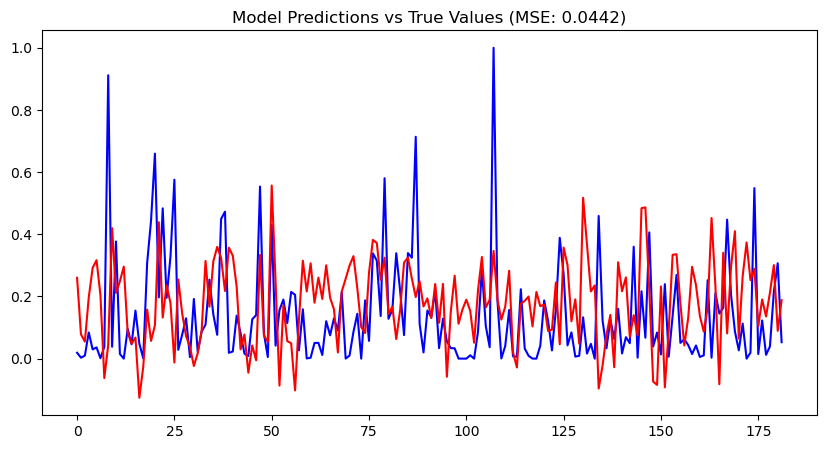

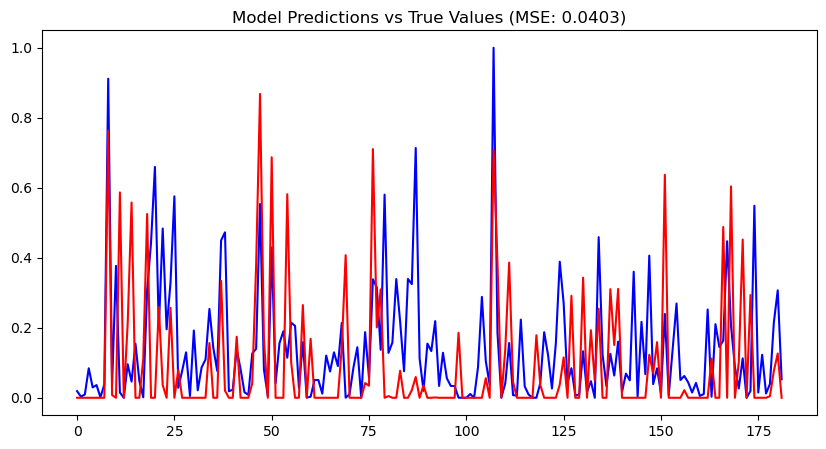

In [7]:
best = model.optuna_trial(ntrials=2)

In [8]:
best.params

{'hidden_dims': [512, 256],
 'dropout_rate': 0.04809432531556734,
 'learning_rate': 1.8966357123653303e-05,
 'weight_decay': 0.0005671606121933606,
 'output_activation': 'relu'}

In [9]:
best.value

0.13891346752643585

In [11]:
def apply_best_hyperparams(model, best_params):
    # Unpack parameters
    hidden_dims = best_params["hidden_dims"]
    dropout_rate = best_params["dropout_rate"]
    learning_rate = best_params["learning_rate"]
    weight_decay = best_params["weight_decay"]
    output_activation = best_params.get("output_activation", "none")

    # Map activation string to boolean flags
    sigmoid_output = output_activation == "sigmoid"
    relu_output = output_activation == "relu"

    # Build and train the model
    model.build_model(
        dropout_rate=dropout_rate,
        hidden_dims=hidden_dims,
        Sigmoid_output=sigmoid_output,
        ReLU_output=relu_output,
    )

    model.train_model(
        learning_rate=learning_rate,
        weight_decay=weight_decay,
        epochs=1000,  # You can make this an argument if needed
        batch_size=128  # Likewise
    )


In [12]:
apply_best_hyperparams(model, best.params)


Model summary: ==========================================================================================
Layer (type:depth-idx)                   Output Shape              Param #
FFNN                                     [1, 1]                    --
├─Sequential: 1-1                        [1, 1]                    --
│    └─Linear: 2-1                       [1, 512]                  50,135,552
│    └─BatchNorm1d: 2-2                  [1, 512]                  1,024
│    └─ELU: 2-3                          [1, 512]                  --
│    └─Dropout: 2-4                      [1, 512]                  --
│    └─Linear: 2-5                       [1, 256]                  131,328
│    └─BatchNorm1d: 2-6                  [1, 256]                  512
│    └─ELU: 2-7                          [1, 256]                  --
│    └─Dropout: 2-8                      [1, 256]                  --
│    └─Linear: 2-9                       [1, 1]                    257
│    └─ReLU: 2-10              

(np.float32(0.051825315), np.float32(0.15063867))

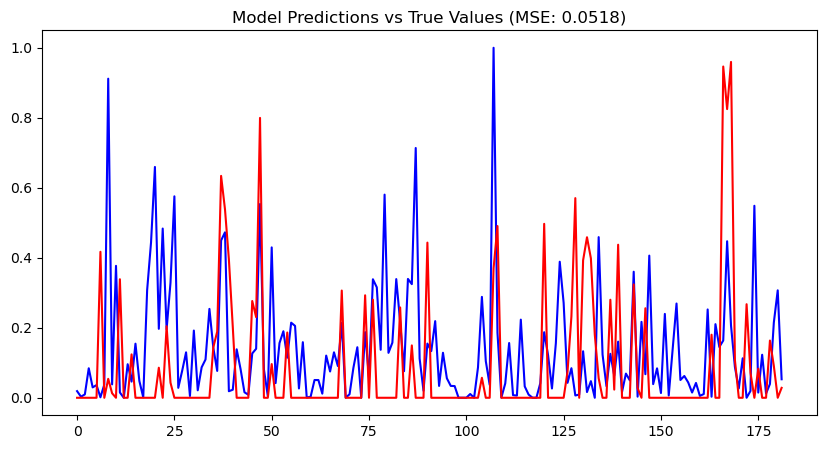

In [13]:
model.plot_model_on_test()

In [5]:
model_cnn = Model_CNN(data_path='/Users/jeppegrejspetersen/Code/Final_project_AppML/era5')
model_cnn.load_data(sub_sampling=False)
model_cnn.prepare_data_for_tensorflow(test_size=0.1)
#best_cnn = model_cnn.optuna_trial(ntrials=1)
#apply_best_hyperparams(model_cnn, best_cnn.params)
#model_cnn.plot_model_on_test()
subsampled_conv_layers = [
    (32, 3, 2),
    (64, 3, 2),
    (64, 3, 1)
]
subsampled_fc_layers = [128, 64]
model_cnn.build_model(dropout_rate= 0.3, conv_layers=subsampled_conv_layers,fc_layers=subsampled_fc_layers,)
model_cnn.train_model(loss_fcn='mae',
    learning_rate=0.001,
    weight_decay=0.0001,
    epochs=1000,
    batch_size=128
)
model_cnn.plot_model_on_test()

Msl input shape: (1827, 120, 408)
input_file_names: ['era5_1940_mean_sea_level_pressure.nc', 'era5_1941_mean_sea_level_pressure.nc', 'era5_1942_mean_sea_level_pressure.nc', 'era5_1943_mean_sea_level_pressure.nc', 'era5_1944_mean_sea_level_pressure.nc']
T850 input shape: (1827, 120, 408)
input_file_names_t850: ['era5_1940_temperature_850hPa.nc', 'era5_1941_temperature_850hPa.nc', 'era5_1942_temperature_850hPa.nc', 'era5_1943_temperature_850hPa.nc', 'era5_1944_temperature_850hPa.nc']
Precipitation target shape: (1827,)
target_file_names: ['era5_1940_total_precipitation.nc', 'era5_1941_total_precipitation.nc', 'era5_1942_total_precipitation.nc', 'era5_1943_total_precipitation.nc', 'era5_1944_total_precipitation.nc']
No sub-sampling applied.
X shape: (1827, 2, 120, 408)
Precipitation target shape: (1827,)
X_train shape: (1645, 2, 120, 408)
y_train shape: (1645,)
X_test shape:  (182, 2, 120, 408)
y_test shape:  (182,)
Model summary: ==========================================================

KeyboardInterrupt: 